In [255]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')

In [257]:
june_data = pd.concat([df1,df2,df3,df4], ignore_index = True)
june_data.rename(columns={'EXITS                                                               ':"CU_EXITS", \
                          'ENTRIES': 'CU_ENTRIES'}, inplace=True)
june_data['DateTime'] = pd.to_datetime(june_data['DATE'] + ' ' + june_data['TIME'])

In [258]:
jd_daily = (june_data.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[['CU_ENTRIES','CU_EXITS']].first())

In [260]:
jd_daily[['ENTRIES','EXITS']] = (jd_daily
                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])[[ "CU_ENTRIES", 'CU_EXITS']]
                                        .apply(lambda x: x.subtract(x.shift(1))))


In [261]:
jd_daily.head()

,C/A,UNIT,SCP,STATION,DATE,CU_ENTRIES,CU_EXITS,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,06/01/2019,7080105,2398899,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/02/2019,7081001,2399154,896.0,255.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7081661,2399345,660.0,191.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7083157,2399747,1496.0,402.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7084813,2400180,1656.0,433.0


In [262]:
jd_daily.dropna(subset=['ENTRIES', 'EXITS'], inplace = True)

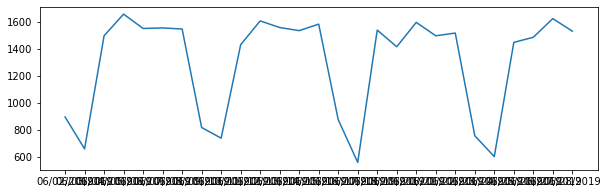

In [263]:
mask = ((jd_daily["C/A"] == "A002") &
        (jd_daily["UNIT"] == "R051") & 
        (jd_daily["SCP"] == "02-00-00") & 
        (jd_daily["STATION"] == "59 ST"))
filtered_jdd = jd_daily[mask]
plt.figure(figsize=(10,3))
plt.plot(filtered_jdd['DATE'],filtered_jdd['ENTRIES'])
plt.show()

In [264]:
jd_daily_CUS = jd_daily.groupby(['SCP','DATE'])[['ENTRIES', 'EXITS']].sum()
jd_daily_CUS

ENTRIES      EXITS
SCP      DATE                            
00-00-00 06/02/2019   370204.0   400629.0
         06/03/2019   295149.0   324042.0
         06/04/2019   643845.0   653954.0
         06/05/2019   628450.0   649926.0
         06/06/2019 -6640915.0 -5996681.0
...                        ...        ...
05-06-01 06/24/2019        0.0        0.0
         06/25/2019     1077.0      173.0
         06/26/2019     1094.0      166.0
         06/27/2019     1090.0      166.0
         06/28/2019     1105.0      179.0

[5929 rows x 2 columns]

In [265]:
jd_daily_station = jd_daily.groupby(['STATION', 'DATE'])[['ENTRIES', 'EXITS']].sum().reset_index()
jd_daily_station

,STATION,DATE,ENTRIES,EXITS
0,1 AV,06/02/2019,7053.0,9440.0
1,1 AV,06/03/2019,5157.0,6754.0
2,1 AV,06/04/2019,18130.0,19821.0
3,1 AV,06/05/2019,17840.0,19035.0
4,1 AV,06/06/2019,19426.0,21084.0
...,...,...,...,...
10190,ZEREGA AV,06/24/2019,1064.0,1091.0
10191,ZEREGA AV,06/25/2019,2695.0,2591.0
10192,ZEREGA AV,06/26/2019,2657.0,2494.0
10193,ZEREGA AV,06/27/2019,2861.0,2760.0


In [266]:
AV1 = jd_daily_station[jd_daily_station['STATION']=='1 AV']
AV1

,STATION,DATE,ENTRIES,EXITS
0,1 AV,06/02/2019,7053.0,9440.0
1,1 AV,06/03/2019,5157.0,6754.0
2,1 AV,06/04/2019,18130.0,19821.0
3,1 AV,06/05/2019,17840.0,19035.0
4,1 AV,06/06/2019,19426.0,21084.0
5,1 AV,06/07/2019,19003.0,20141.0
6,1 AV,06/08/2019,20153.0,21967.0
7,1 AV,06/09/2019,7207.0,9497.0
8,1 AV,06/10/2019,5517.0,7157.0
9,1 AV,06/11/2019,18123.0,21090.0


In [267]:
AV1['DAY_OF_WEEK'] = pd.to_datetime(AV1['DATE']).dt.day_name()
AV1

<ipython-input-267-127e8d325bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AV1['DAY_OF_WEEK'] = pd.to_datetime(AV1['DATE']).dt.day_name()


,STATION,DATE,ENTRIES,EXITS,DAY_OF_WEEK
0,1 AV,06/02/2019,7053.0,9440.0,Sunday
1,1 AV,06/03/2019,5157.0,6754.0,Monday
2,1 AV,06/04/2019,18130.0,19821.0,Tuesday
3,1 AV,06/05/2019,17840.0,19035.0,Wednesday
4,1 AV,06/06/2019,19426.0,21084.0,Thursday
5,1 AV,06/07/2019,19003.0,20141.0,Friday
6,1 AV,06/08/2019,20153.0,21967.0,Saturday
7,1 AV,06/09/2019,7207.0,9497.0,Sunday
8,1 AV,06/10/2019,5517.0,7157.0,Monday
9,1 AV,06/11/2019,18123.0,21090.0,Tuesday


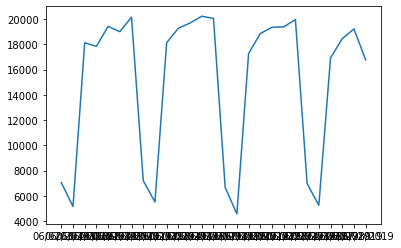

In [268]:
plt.plot(AV1['DATE'],AV1['ENTRIES'])
plt.show()

In [269]:
week_count_list1 = AV1[0:7]['ENTRIES']
week_count_list2 = AV1[7:14]['ENTRIES']
week_count_list3 = AV1[14:21]['ENTRIES']
week_count_list4 = AV1[21:28]['ENTRIES']

In [270]:
week_count_list1

0     7053.0
1     5157.0
2    18130.0
3    17840.0
4    19426.0
5    19003.0
6    20153.0
Name: ENTRIES, dtype: float64

In [271]:
import numpy as np
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

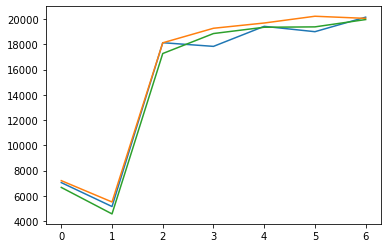

In [272]:
plt.plot(np.arange(7), week_count_list1)
plt.plot(np.arange(7), week_count_list2)

plt.plot(np.arange(7), week_count_list3)




In [273]:
total_ridership_counts = jd_daily_station.groupby(['STATION'])[['ENTRIES']].sum()
total_ridership_counts  

,ENTRIES
STATION,
1 AV,406514.0
103 ST,667263.0
103 ST-CORONA,483919.0
104 ST,71409.0
110 ST,253956.0
...,...
WOODLAWN,169503.0
WORLD TRADE CTR,438179.0
WTC-CORTLANDT,323161.0


In [274]:
total_ridership_counts = total_ridership_counts[(total_ridership_counts >=0) & (total_ridership_counts < .25*1e9)]

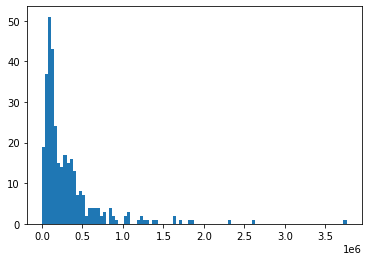

In [276]:
plt.hist(total_ridership_counts, bins = 100)

plt.show()